In [1]:
using Pkg
Pkg.activate(".");
Pkg.add("SpecialFunctions");
Pkg.add("Plots");
Pkg.add("Statistics");
Pkg.add("BenchmarkTools");
Pkg.add("Profile");
Pkg.add("ProfileView");
Pkg.status();

  Activating environment at `C:\Users\User\Documents\Graduate Files\Physics 215\Physics-215-Julia-Codes\Session 02\Project.toml`
    Updating registry at `C:\Users\User\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `C:\Users\User\Documents\Graduate Files\Physics 215\Physics-215-Julia-Codes\Session 02\Project.toml`
  No Changes to `C:\Users\User\Documents\Graduate Files\Physics 215\Physics-215-Julia-Codes\Session 02\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\Documents\Graduate Files\Physics 215\Physics-215-Julia-Codes\Session 02\Project.toml`
  No Changes to `C:\Users\User\Documents\Graduate Files\Physics 215\Physics-215-Julia-Codes\Session 02\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\Documents\Graduate Files\Physics 215\Physics-215-Julia-Codes\Session 02\Project.toml`
  No Changes to `C:\Users\User\Documents\Gradua

      Status `C:\Users\User\Documents\Graduate Files\Physics 215\Physics-215-Julia-Codes\Session 02\Project.toml`
  [6e4b80f9] BenchmarkTools v1.2.0
  [91a5bcdd] Plots v1.22.6
  [c46f51b8] ProfileView v0.6.10
  [276daf66] SpecialFunctions v1.8.0
  [9abbd945] Profile
  [10745b16] Statistics


# KR1: The Complete Elliptic Integral of the First Kind

In this session, we will make a custom function in Julia that will evaluate the [complete elliptic integral of the first kind](https://mathworld.wolfram.com/CompleteEllipticIntegraloftheFirstKind.html). This physics textbook function is very important in solving the periods of many oscillators, and in particular is used to compute the period of pendulums.

Given a simple pendulum with length $\ell$, mass $m$, and initial angular displacement $\theta_0$. By conservation of energy, we have
\begin{equation}
    -m\mathrm{g}\ell\cos\theta_0=\frac{1}{2}m\ell^2\dot{\theta}^2-m\mathrm{g}\ell\cos\theta.
\end{equation}
Then, rearranging terms, dividing both sides by $\frac{1}{2}m\ell^2$, rewriting $\omega_0^2=\mathrm{g}/\ell$, using $\cos\theta=1-2\sin^2(\frac{1}{2}\theta)$, taking the square root of both sides, and factoring $\sin^2(\frac{1}{2}\theta_0)$, we have
\begin{equation}
    \frac{\mathrm{d}\theta}{\mathrm{d}t}=2\omega_0\sin^2\left(\tfrac{1}{2}\theta_0\right)\sqrt{1-\dfrac{\sin^2\left(\tfrac{1}{2}\theta\right)}{\sin^2\left(\tfrac{1}{2}\theta_0\right)}}.
\end{equation}
Then, rearranging terms, integrating both sides with respect to time $t\in[0,T/4]$ and angular displacement $\theta\in[0,\theta_0]$, where $T$ is the period of the pendulum, we have:
\begin{equation}
    T=\dfrac{2}{\omega_0}\int_0^{\theta_0}\dfrac{\mathrm{d}\theta/\sin\left(\frac{1}{2}\theta_0\right)}{\sqrt{1-\sin^2\left(\tfrac{1}{2}\theta\right)/\sin^2\left(\tfrac{1}{2}\theta_0\right)}}.
\end{equation}
To aid now in evaluating this, we use the substitution $\sin\phi=\sin(\theta/2)/\sin(\theta_0/2)$ so $2\cos\phi\,\mathrm{d}\phi/\cos\left(\frac{1}{2}\theta\right)=\mathrm{d}\theta/\sin\left(\frac{1}{2}\theta_0\right)$, thus after many simplifications, and letting $k=\sin(\theta_0/2)$, we have period of pendulum is
\begin{equation}
    T=\dfrac{4}{\omega_0}\int_0^{\pi/2}\dfrac{\mathrm{d}\phi}{\sqrt{1-k^2\sin^2\phi}}, \qquad k=\sin(\theta_0/2).
\end{equation}
and the integral in the period is the Complete Elliptic Integral of the First Kind.

The Complete Elliptic Integral of the First Kind $K(k)$ is given by:
\begin{equation}
    K(k)=\int_0^{\pi/2}\dfrac{\mathrm{d}\theta}{\sqrt{1-k^2\sin^2\theta}}, \qquad |k|<1,
\end{equation}
However, evaluating the function by integrating this expression would be cumbersome because it does not give you the correct values. ~(I know, I've tried.)~

Instead, we use the series expansion of $K(k)$ given in Arfken:
\begin{equation}
    K(k)=\dfrac{\pi}{2}\sum_{n=0}^\infty\left[\dfrac{(2n-1)!!}{(2n)!!}\right]^2k^n=\dfrac{\pi}{2}\left[1+\left(\dfrac{1}{2}\right)^2k+\left(\dfrac{1\cdot3}{2\cdot4}\right)^2k^2+\left(\dfrac{1\cdot3\cdot5}{2\cdot4\cdot6}\right)^2k^3+\dotsc\right], \quad |k|<1
\end{equation}
to reliably evaluate the function.

In implementing this form of $K(k)$, we must note that our accuracy is determined by the number of terms we put in our sum.

Doing this in Julia, we have the following code.

In [2]:
# Evaluates the double factorial
function double_factorial(n)
    if n < 2
        return 1
    end
    return n * double_factorial(n-2)
end

# Evaluate the complete elliptic integral of the first kind K(k)
function K(x::Float64)
    result = (pi/2) * (1 + sum((double_factorial(BigInt(2*n-1))/double_factorial(BigInt(2*n)))^2 * x^n for n=1:150))
    return result
end;

Notice that we enclosed our argument for ```double_factorial(n)``` with ```BigInt```. This is because Julia by default only considers ```n``` to be ```Int64```. However the double factorial function diverges exponentially, thus we invoke ```BigInt``` so that Julia can reach these higher values.

# KR2: Comparing our ```K(k)``` with Julia's ```ellipk(k)```

Let us compare this to the ```ellipk(k)``` function in Julia's ```Special Functions.jl``` [module](https://specialfunctions.juliamath.org/stable/functions_list/#SpecialFunctions.ellipk).

To have an overview of the output of ```K(k)``` and ```ellipk(k)```, let us first plot it for $k\in[0,1)$.

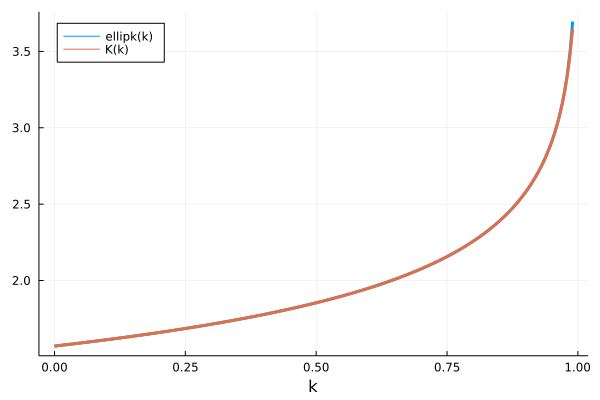

In [3]:
using SpecialFunctions
using Plots

# Values of k to evaluate
k = 0.000:0.005:0.990

# Arrays where the result will be stored
own_func = zeros(length(k))  # To store result of K(k)
jul_func = zeros(length(k))  # To store result of ellipk(k)

# Result of each function
own_func = K.(k)
jul_func = ellipk.(k)

gr()
plot(k, [jul_func, own_func], xlabel="k", label=["ellipk(k)" "K(k)"], legend=:topleft, lw=3, fmt=:png)

Which is good because it appears that our implementation of $K(k)$ gives results that agree with Julia's ```ellipk(k)``` -- except for values close to $k=1$. This makes sense because $K(k)$ diverges as $k\to1$, and thus to reach the same result as ```ellipk(k)```, we must evaluate the sum for more terms.

To take a closer look at the accuracy of our implementation, we plot the absolute difference between our ```K(k)``` and Julia's ```ellip(k)```, $\Delta$.

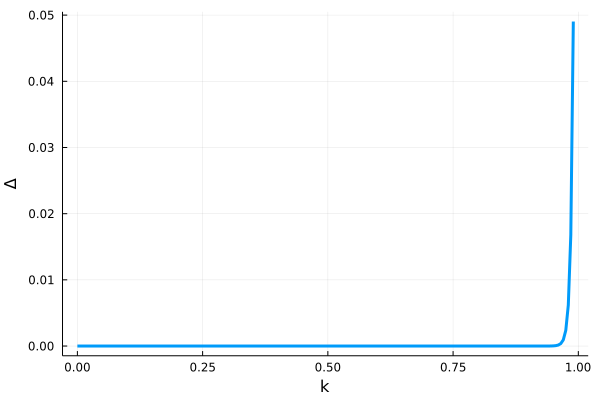

In [4]:
Δ = abs.(own_func - jul_func)

gr()
plot(k, Δ, xlabel="k", ylabel="Δ", label=false, lw=3, fmt=:png)

And indeed, from this plot, it is evident that the difference between the two functions $\Delta$ increase as $k\to1$ or the function's point of divergence.

While the decrease of accuracy of ```K(k)``` as $k\to1$ is expected, it is also nice to look at how ```K(k)``` fairs for values not close to $1$. To this regard, we look at the absolute difference for $k\in[0,0.900)$.

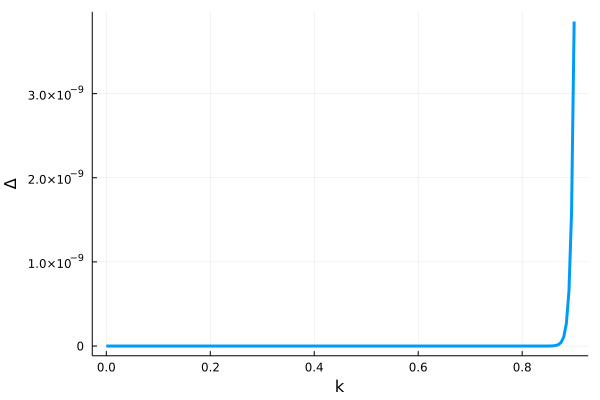

In [5]:
gr()
plot(k[1:length(k)-18], Δ[1:length(k)-18], xlabel="k", ylabel="Δ", label=false, lw=3, fmt=:png)

And we see that the accuracy of ```K(k)``` begins to decrease as $k>0.800$.

We can use Julia's ```Statistics``` [module](https://docs.julialang.org/en/v1/stdlib/Statistics/) to observe the mean error of our function with respect to ```ellipk(k)```.

In [6]:
using Statistics

println("K(k) mean error is                 : $(mean(Δ[1:length(k)-18])).")
println("K(k) error's standard deviation is : $(std(Δ[1:length(k)-18])).")

K(k) mean error is                 : 3.616920659449385881742753746335836395824059766021437454202518625997260420458924e-11.
K(k) error's standard deviation is : 3.132799941900036179804317578841049042482712646136370821935201267178480585962553e-10.


And since the standard deviation of the error is less than the mean of the error, we can be certain that our implementation of $K(k)$ is accurate when $k<0.900$. Good!

# KR3: Using the ```BenchmarkTools.jl``` Module

Now we try to use Julia's ```BenchmarkTools.jl``` module. Let's try it using our implemented function $K(k)$.

In [7]:
using BenchmarkTools

k_benchmark = @benchmark K(0.5)

BenchmarkTools.Trial: 367 samples with 1 evaluation.
 Range (min … max):   8.216 ms … 107.891 ms  ┊ GC (min … max):  0.00% … 37.14%
 Time  (median):      8.399 ms               ┊ GC (median):     0.00%
 Time  (mean ± σ):   13.639 ms ±  21.111 ms  ┊ GC (mean ± σ):  15.43% ±  8.70%

  █                                                             
  █▆▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▅▁▁▁▁▁▁▁▁▁▁▁▁▁▁▅▁▁▁▁▁▁▄▄▁▁▄▅▇ ▅
  8.22 ms       Histogram: log(frequency) by time       106 ms <

 Memory estimate: 4.58 MiB, allocs estimate: 252007.

And we see that on average, after 360 trials, our function takes $(13.91\pm21.20)\,\mathrm{ms}$ to evaluate the complete elliptic integral for some $k=k_0$, and is shared between 252007 chunks of memory that is around 4.58 MiB in size. This is good, since we do not want to use up too much memory to just evaluate $K(k)$, but it is interesting that you would need $\sim2\times10^6$ chunks to calculate it.

# KR4: Comparing ```@time``` vs ```@btime``` and others

Julia's ```BenchmarkTools.jl``` module provides us with ```@btime``` and ```@belapsed``` macros, that are parallel to the ```@time``` and ```@elapsed``` macros used in Session 0.

The only difference between the ```@time``` and ```@btime``` variant is that the ```@time``` only gives you the time it took for Julia to compile and run the function you are timing, whereas the ```@btime``` variants runs the function you are timing some number of times, then returns only the *shortest* time it took your code to run, as mentioned in the [documentation](https://juliaci.github.io/BenchmarkTools.jl/dev/manual/).

Because of this, it is best to find the ```@time``` it takes your function/code to run when you expect a run it once, whereas it is best to find the ```@btime``` it takes your function/code to run it multiple times, or when it is involved in an iterative function, where that function/code is called a number of times.

To add, the results you get when running ```@time``` and ```@btime``` may differ.

Let us see how ```@time``` and ```@elapsed``` compares to ```@btime``` and ```@belapsed```.

In [8]:
@time K(0.5)

  0.008709 seconds (252.01 k allocations: 4.583 MiB)


1.854074677301371846158833522758673537400439386404315614529093330784475062343247

In [9]:
@btime K(0.5)

  8.173 ms (252007 allocations: 4.58 MiB)


1.854074677301371846158833522758673537400439386404315614529093330784475062343247

In [10]:
@elapsed K(0.5)

0.0083883

In [11]:
@belapsed K(0.5)

0.0082127

And we see that indeed ```@time``` and its ```@btime``` variant give you the same result, however ```@btime``` time result is a little different because it ran the code multiple time and only took the shortest run time.

Outside these macros, we have the [```@timed```](https://docs.julialang.org/en/v1/base/base/#Base.@timed) and [```@timev```](https://docs.julialang.org/en/v1/base/base/#Base.@timev) macros. These macros do the same thing, which is to output the same thing as ```@time```, then output all the other relevant data in running the code. However, it would be more useful to invoke the ```@timed``` macro as you may store the values in a variable, whereas with ```@timev``` you can't.

In [12]:
@timed K(0.5)

(value = 1.854074677301371846158833522758673537400439386404315614529093330784475062343247, time = 0.0097804, bytes = 4805304, gctime = 0.0, gcstats = Base.GC_Diff(4805304, 90901, 68401, 92705, 0, 0, 0, 0, 0))

In [13]:
@timev K(0.5)

  0.008675 seconds (252.01 k allocations: 4.583 MiB)
elapsed time (ns): 8674700
bytes allocated:   4805304
pool allocs:       92705
malloc() calls:    90901
realloc() calls:   68401


1.854074677301371846158833522758673537400439386404315614529093330784475062343247

In [14]:
bench_timed = @timed K(0.5)
bench_timev = @timev K(0.5)

  0.008751 seconds (252.01 k allocations: 4.583 MiB)
elapsed time (ns): 8751100
bytes allocated:   4805304
pool allocs:       92705
malloc() calls:    90901
realloc() calls:   68401


1.854074677301371846158833522758673537400439386404315614529093330784475062343247

In [15]:
println(bench_timed)
println(bench_timev)

(value = 1.854074677301371846158833522758673537400439386404315614529093330784475062343247, time = 0.0084722, bytes = 4805304, gctime = 0.0, gcstats = Base.GC_Diff(4805304, 90901, 68401, 92705, 0, 0, 0, 0, 0))
1.854074677301371846158833522758673537400439386404315614529093330784475062343247


And we see that indeed you cannot store your time with the ```@timev``` macro.

# KR5 and KR6: Using Julia's ```Profiler.jl``` Module

Now, we use Julia's ```Profiler.jl``` module to profile ```K(k)```.

In [16]:
using Profile
using ProfileView

Profile.clear()
K(0.5);
@profile for k=0.000:0.005:0.990 K(k) end
Profile.print()
ProfileView.view()

Overhead ╎ [+additional indent] Count File:Line; Function
   ╎1532 @Base\task.jl:411; (::IJulia.var"#15#18")()
   ╎ 1532 ...lia\src\eventloop.jl:8; eventloop(socket::ZMQ.Socket)
   ╎  1532 @Base\essentials.jl:706; invokelatest
   ╎   1532 @Base\essentials.jl:708; #invokelatest#2
   ╎    1532 ...\execute_request.jl:67; execute_request(socket::ZMQ.So...
   ╎     1532 ...SoftGlobalScope.jl:65; softscope_include_string(m::M...
   ╎    ╎ 1532 @Base\loading.jl:1116; include_string(mapexpr::typ...
   ╎    ╎  1532 @Base\boot.jl:360; eval
   ╎    ╎   1532 ...le\src\Profile.jl:28; top-level scope
   ╎    ╎    1532 In[16]:6; macro expansion
   ╎    ╎     1532 In[2]:11; K(x::Float64)
   ╎    ╎    ╎ 1532 @Base\reduce.jl:528; sum
   ╎    ╎    ╎  1532 @Base\reduce.jl:528; #sum#222
   ╎    ╎    ╎   1532 @Base\reduce.jl:501; sum
   ╎    ╎    ╎    1532 @Base\reduce.jl:501; #sum#221
   ╎    ╎    ╎     1532 @Base\reduce.jl:287; mapreduce
   ╎    ╎    ╎    ╎ 1532 @Base\reduce.jl:287; #mapreduce#218
   ╎   

   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +2 2    ...number.jl:7; convert
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +3 2    @Base\gmp.jl:313; BigInt(x::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +4 2    @Base\gmp.jl:146; realloc2(a::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +5 2    @Base\gmp.jl:56; BigInt
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +6 2    @Base\gmp.jl:56; BigInt#1
  2╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +7 2    @Base\gmp.jl:143; init2!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +1 1    @Base\gmp.jl:568; cmp
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +2 1    @Base\gmp.jl:228; cmp
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎   1366 In[2]:6; double_factoria...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎    4    In[2]:3; double_factoria...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎     4    @Base\gmp.jl:662; <
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +1 4    @Base\gmp.jl:571; cmp
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +2 4    @Base\gmp.jl:471; big
   ╎    ╎    ╎    ╎    ╎    ╎  

   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +8 1147 In[2]:6; double_factoria...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +9 2    In[2]:3; double_factoria...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +10 2    @Base\gmp.jl:662; <
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +11 2    @Base\gmp.jl:571; cmp
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +12 1    @Base\gmp.jl:471; big
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +13 1    ...number.jl:7; convert
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +14 1    @Base\gmp.jl:313; BigInt(x::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +15 1    @Base\gmp.jl:146; realloc2(a::Int64)
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +16 1    @Base\gmp.jl:145; realloc2!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +12 1    @Base\gmp.jl:568; cmp
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +13 1    @Base\gmp.jl:228; cmp
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +9 1137 In[2]:6; double_factoria...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +10 3    In[2]:3; double_factoria...
   ╎    ╎    ╎    ╎

  2╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +25 2    @Base\gmp.jl:145; realloc2!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +18 1044 In[2]:6; double_factoria...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +19 2    In[2]:3; double_factoria...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +20 2    @Base\gmp.jl:662; <
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +21 2    @Base\gmp.jl:571; cmp
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +22 2    @Base\gmp.jl:471; big
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +23 2    ...number.jl:7; convert
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +24 2    @Base\gmp.jl:313; BigInt(x::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +25 2    @Base\gmp.jl:146; realloc2(a::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +26 1    @Base\gmp.jl:56; BigInt
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +27 1    @Base\gmp.jl:56; BigInt#1
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +26 1    @Base\gmp.jl:145; realloc2!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +19 1029 In[2]:6; double_factoria...
   ╎    ╎    

   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +37 1    In[2]:3; double_factoria...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +38 1    @Base\gmp.jl:662; <
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +39 1    @Base\gmp.jl:571; cmp
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +40 1    @Base\gmp.jl:471; big
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +41 1    ...number.jl:7; convert
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +42 1    @Base\gmp.jl:313; BigInt(x::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +43 1    @Base\gmp.jl:146; realloc2(a::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +44 1    @Base\gmp.jl:56; BigInt
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +45 1    @Base\gmp.jl:56; BigInt#1
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +46 1    @Base\gmp.jl:143; init2!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +37 697  In[2]:6; double_factoria...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +38 3    In[2]:3; double_factoria...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +39 3    @Base\gmp.jl:662; <
   ╎    ╎    ╎    ╎    ╎

   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +52 1    @Base\gmp.jl:313; BigInt(x::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +53 1    @Base\gmp.jl:146; realloc2(a::Int64)
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +54 1    @Base\gmp.jl:145; realloc2!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +47 571  In[2]:6; double_factoria...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +48 4    In[2]:3; double_factoria...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +49 4    @Base\gmp.jl:662; <
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +50 4    @Base\gmp.jl:571; cmp
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +51 4    @Base\gmp.jl:471; big
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +52 4    ...number.jl:7; convert
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +53 1    @Base\gmp.jl:312; BigInt(x::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +54 1    ...tfuncs.jl:631; ndigits##kw
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +55 1    ...tfuncs.jl:631; #ndigits#365
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +56 1    ...tfuncs.jl:603; ndigi

  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +65 1    @Base\gmp.jl:145; realloc2!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +61 1    @Base\gmp.jl:568; cmp
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +62 1    @Base\gmp.jl:228; cmp
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +58 348  In[2]:6; double_factoria...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +59 1    In[2]:3; double_factoria...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +60 1    @Base\gmp.jl:662; <
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +61 1    @Base\gmp.jl:571; cmp
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +62 1    @Base\gmp.jl:471; big
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +63 1    ...number.jl:7; convert
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +64 1    @Base\gmp.jl:313; BigInt(x::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +65 1    @Base\gmp.jl:146; realloc2(a::Int64)
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +66 1    @Base\gmp.jl:145; realloc2!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +59 343  In[2]:6; double_factoria...
   ╎    ╎    ╎    ╎

   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +77 1    @Base\gmp.jl:146; realloc2(a::Int64)
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +78 1    @Base\gmp.jl:145; realloc2!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +76 1    @Base\gmp.jl:314; BigInt(x::Int64)
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +77 1    ...number.jl:136; sign
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +71 232  In[2]:6; double_factoria...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +72 1    In[2]:3; double_factoria...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +73 1    @Base\gmp.jl:662; <
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +74 1    @Base\gmp.jl:571; cmp
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +75 1    @Base\gmp.jl:471; big
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +76 1    ...number.jl:7; convert
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +77 1    @Base\gmp.jl:313; BigInt(x::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +78 1    @Base\gmp.jl:146; realloc2(a::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +79 1    @Base\gmp.jl:56; BigInt


   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +94 1    @Base\gmp.jl:56; BigInt#1
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +95 1    @Base\gmp.jl:143; init2!
  2╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +93 2    @Base\gmp.jl:145; realloc2!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +86 96   In[2]:6; double_factoria...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +87 1    In[2]:3; double_factoria...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +88 1    @Base\gmp.jl:662; <
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +89 1    @Base\gmp.jl:571; cmp
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +90 1    @Base\gmp.jl:568; cmp
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +91 1    @Base\gmp.jl:228; cmp
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +87 93   In[2]:6; double_factoria...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +88 4    In[2]:3; double_factoria...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +89 4    @Base\gmp.jl:662; <
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +90 4    @Base\gmp.jl:571; cmp
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +91 

   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +105 1    ...number.jl:7; convert
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +106 1    @Base\gmp.jl:313; BigInt(x::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +107 1    @Base\gmp.jl:146; realloc2(a::Int64)
  1╎    ╎    ╎    ╎    ╎    ╎    ╎     +108 1    @Base\gmp.jl:145; realloc2!
  1╎    ╎    ╎    ╎    ╎    ╎    ╎     +101 49   In[2]:6; double_factoria...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +102 47   In[2]:6; double_factoria...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +103 1    In[2]:3; double_factoria...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +104 1    @Base\gmp.jl:662; <
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +105 1    @Base\gmp.jl:571; cmp
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +106 1    @Base\gmp.jl:471; big
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +107 1    ...number.jl:7; convert
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +108 1    @Base\gmp.jl:313; BigInt(x::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +109 1    @Base\gmp.jl:146; realloc2(a::In

   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +126 1    @Base\gmp.jl:471; big
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +127 1    ...number.jl:7; convert
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +128 1    @Base\gmp.jl:313; BigInt(x::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +129 1    @Base\gmp.jl:146; realloc2(a::Int64)
  1╎    ╎    ╎    ╎    ╎    ╎    ╎     +130 1    @Base\gmp.jl:145; realloc2!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +123 3    In[2]:6; double_factoria...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +124 1    In[2]:3; double_factoria...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +125 1    @Base\gmp.jl:662; <
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +126 1    @Base\gmp.jl:571; cmp
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +127 1    @Base\gmp.jl:471; big
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +128 1    ...number.jl:7; convert
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +129 1    @Base\gmp.jl:313; BigInt(x::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +130 1    @Base\gmp.jl:146; realloc2(a::Int64)
 

   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +108 1    @Base\gmp.jl:343; rem
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +109 1    @Base\gmp.jl:312; BigInt(x::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +110 1    ...tfuncs.jl:631; ndigits##kw
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +111 1    ...tfuncs.jl:631; #ndigits#365
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +112 1    ...tfuncs.jl:603; ndigits0z(x::In...
  1╎    ╎    ╎    ╎    ╎    ╎    ╎     +113 1    ...tfuncs.jl:0; ndigits0zpb(x::...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +107 3    @Base\int.jl:923; -
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +108 3    @Base\gmp.jl:479; -
  1╎    ╎    ╎    ╎    ╎    ╎    ╎     +109 3    @Base\gmp.jl:158; sub(a::BigInt, ...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +110 2    @Base\gmp.jl:56; Type##kw
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +111 2    @Base\gmp.jl:56; BigInt#1
  2╎    ╎    ╎    ╎    ╎    ╎    ╎     +112 2    @Base\gmp.jl:143; init2!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎     +106 2    @Base\gmp.jl:479; *

   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +97 1    @Base\gmp.jl:56; Type##kw
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +98 1    @Base\gmp.jl:56; BigInt#1
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +99 1    @Base\gmp.jl:143; init2!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +93 1    @Base\gmp.jl:479; *
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +94 1    @Base\gmp.jl:158; mul(a::BigInt, ...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +95 1    @Base\gmp.jl:56; Type##kw
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +96 1    @Base\gmp.jl:56; BigInt#1
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +97 1    @Base\gmp.jl:143; init2!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +93 1    @Base\int.jl:921; -
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +94 1    @Base\gmp.jl:343; rem
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +95 1    @Base\gmp.jl:313; BigInt(x::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +96 1    @Base\gmp.jl:146; realloc2(a::Int64)
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +97 1    @Base\gmp.jl:145; realloc2!
   ╎    ╎ 

  2╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +83 2    @Base\gmp.jl:145; realloc2!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +79 1    @Base\int.jl:923; -
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +80 1    @Base\gmp.jl:479; -
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +81 1    @Base\gmp.jl:158; sub(a::BigInt, ...
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +82 1    @Base\gmp.jl:157; sub!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +78 1    @Base\gmp.jl:479; *
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +79 1    @Base\gmp.jl:158; mul(a::BigInt, ...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +80 1    @Base\gmp.jl:56; Type##kw
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +81 1    @Base\gmp.jl:56; BigInt#1
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +82 1    @Base\gmp.jl:143; init2!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +78 2    @Base\int.jl:921; -
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +79 2    @Base\gmp.jl:343; rem
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +80 2    @Base\gmp.jl:313; BigInt(x::Int64)
   ╎    ╎    ╎    ╎    ╎

  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +70 1    ...cutils.jl:58; finalizer
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +66 1    @Base\int.jl:921; -
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +67 1    @Base\gmp.jl:343; rem
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +68 1    @Base\gmp.jl:313; BigInt(x::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +69 1    @Base\gmp.jl:146; realloc2(a::Int64)
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +70 1    @Base\gmp.jl:145; realloc2!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +65 1    @Base\gmp.jl:479; *
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +66 1    @Base\gmp.jl:158; mul(a::BigInt, ...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +67 1    @Base\gmp.jl:56; Type##kw
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +68 1    @Base\gmp.jl:57; BigInt#1
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +69 1    ...cutils.jl:58; finalizer
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +65 1    @Base\int.jl:921; -
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +66 1    @Base\gmp.jl:343; rem
   ╎    ╎    ╎  

   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +57 114  @Base\gmp.jl:158; mul(a::BigInt, ...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +58 113  @Base\gmp.jl:56; Type##kw
 55╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +59 113  @Base\gmp.jl:56; BigInt#1
 58╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +60 58   @Base\gmp.jl:143; init2!
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +58 1    @Base\gmp.jl:157; mul!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +56 1    @Base\int.jl:923; *
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +57 1    @Base\gmp.jl:479; *
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +58 1    @Base\gmp.jl:158; mul(a::BigInt, ...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +59 1    @Base\gmp.jl:56; Type##kw
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +60 1    @Base\gmp.jl:56; BigInt#1
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +61 1    @Base\gmp.jl:143; init2!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +56 2    @Base\int.jl:921; -
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +57 2    @Base\gmp.jl:343; rem
   ╎    ╎    ╎    ╎    ╎    ╎ 

   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +52 2    @Base\gmp.jl:56; Type##kw
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +53 2    @Base\gmp.jl:56; BigInt#1
  2╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +54 2    @Base\gmp.jl:143; init2!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +48 2    @Base\gmp.jl:479; *
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +49 2    @Base\gmp.jl:158; mul(a::BigInt, ...
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +50 1    @Base\gmp.jl:157; mul!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +48 1    @Base\int.jl:921; -
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +49 1    @Base\gmp.jl:343; rem
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +50 1    @Base\gmp.jl:313; BigInt(x::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +51 1    @Base\gmp.jl:146; realloc2(a::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +52 1    @Base\gmp.jl:56; BigInt
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +53 1    @Base\gmp.jl:57; BigInt#1
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +47 4    @Base\gmp.jl:479; *
  1╎    ╎    ╎    ╎   

  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +42 64   @Base\gmp.jl:56; BigInt#1
 63╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +43 63   @Base\gmp.jl:143; init2!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +37 1    @Base\int.jl:921; -
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +38 1    @Base\gmp.jl:343; rem
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +39 1    @Base\gmp.jl:313; BigInt(x::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +40 1    @Base\gmp.jl:146; realloc2(a::Int64)
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +41 1    @Base\gmp.jl:145; realloc2!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +37 3    @Base\int.jl:923; -
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +38 3    @Base\gmp.jl:479; -
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +39 3    @Base\gmp.jl:158; sub(a::BigInt, ...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +40 3    @Base\gmp.jl:56; Type##kw
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +41 3    @Base\gmp.jl:56; BigInt#1
  2╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +42 2    @Base\gmp.jl:143; init2!
   ╎    ╎    ╎  

  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +35 2    @Base\gmp.jl:56; BigInt#1
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +36 1    @Base\gmp.jl:143; init2!
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +34 1    @Base\gmp.jl:145; realloc2!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +30 1    @Base\int.jl:923; -
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +31 1    @Base\gmp.jl:479; -
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +32 1    @Base\gmp.jl:158; sub(a::BigInt, ...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +33 1    @Base\gmp.jl:56; Type##kw
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +34 1    @Base\gmp.jl:56; BigInt#1
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +35 1    @Base\gmp.jl:143; init2!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +29 1    @Base\gmp.jl:479; *
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +30 1    @Base\gmp.jl:158; mul(a::BigInt, ...
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +31 1    @Base\gmp.jl:157; mul!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +29 1    @Base\int.jl:921; -
   ╎    ╎    ╎    ╎    ╎    ╎ 

   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +26 1    @Base\gmp.jl:146; realloc2(a::Int64)
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +27 1    @Base\gmp.jl:145; realloc2!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +22 2    @Base\gmp.jl:479; *
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +23 2    @Base\gmp.jl:158; mul(a::BigInt, ...
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +24 1    @Base\gmp.jl:157; mul!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +22 3    @Base\int.jl:921; -
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +23 3    @Base\gmp.jl:343; rem
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +24 3    @Base\gmp.jl:313; BigInt(x::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +25 3    @Base\gmp.jl:146; realloc2(a::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +26 1    @Base\gmp.jl:56; BigInt
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +27 1    @Base\gmp.jl:56; BigInt#1
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +28 1    @Base\gmp.jl:143; init2!
  2╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +26 2    @Base\gmp.jl:145; realloc2!
 

   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +16 3    @Base\gmp.jl:158; mul(a::BigInt, ...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +17 2    @Base\gmp.jl:56; Type##kw
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +18 2    @Base\gmp.jl:56; BigInt#1
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +19 1    @Base\gmp.jl:143; init2!
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +17 1    @Base\gmp.jl:157; mul!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +15 4    @Base\int.jl:921; -
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +16 4    @Base\gmp.jl:343; rem
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +17 1    @Base\gmp.jl:312; BigInt(x::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +18 1    ...tfuncs.jl:631; ndigits##kw
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +19 1    ...tfuncs.jl:631; #ndigits#365
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +20 1    ...tfuncs.jl:599; ndigits0z(x::In...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +17 3    @Base\gmp.jl:313; BigInt(x::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +18 3    @Base\gmp.jl:146

   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +8 2    @Base\int.jl:923; -
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +9 2    @Base\gmp.jl:479; -
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +10 2    @Base\gmp.jl:158; sub(a::BigInt, ...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +11 2    @Base\gmp.jl:56; Type##kw
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +12 2    @Base\gmp.jl:56; BigInt#1
  2╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +13 2    @Base\gmp.jl:143; init2!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +7 5    @Base\gmp.jl:479; *
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +8 5    @Base\gmp.jl:158; mul(a::BigInt, ...
  5╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +9 5    @Base\gmp.jl:157; mul!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +7 4    @Base\int.jl:921; -
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +8 4    @Base\gmp.jl:343; rem
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +9 3    @Base\gmp.jl:313; BigInt(x::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎ +10 3    @Base\gmp.jl:146; realloc2(a::Int64)
   ╎    ╎    ╎ 

   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +3 3    @Base\gmp.jl:313; BigInt(x::Int64)
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +4 3    @Base\gmp.jl:146; realloc2(a::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +5 1    @Base\gmp.jl:56; BigInt
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +6 1    @Base\gmp.jl:56; BigInt#1
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +7 1    @Base\gmp.jl:143; init2!
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +5 1    @Base\gmp.jl:145; realloc2!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +1 1    @Base\int.jl:923; -
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +2 1    @Base\gmp.jl:479; -
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +3 1    @Base\gmp.jl:158; sub(a::BigInt, ...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +4 1    @Base\gmp.jl:56; Type##kw
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +5 1    @Base\gmp.jl:56; BigInt#1
  1╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎  +6 1    @Base\gmp.jl:143; init2!
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    ╎     1    @Base\int.jl:921; -
   ╎    ╎    ╎

  1╎    ╎    ╎    ╎    ╎    ╎    ╎     1    ...tfuncs.jl:542; ndigits0zpb(x::...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎ 5    @Base\gmp.jl:313; BigInt(x::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎  5    @Base\gmp.jl:146; realloc2(a::Int64)
   ╎    ╎    ╎    ╎    ╎    ╎    ╎   1    @Base\gmp.jl:56; BigInt
   ╎    ╎    ╎    ╎    ╎    ╎    ╎    1    @Base\gmp.jl:56; BigInt#1
  1╎    ╎    ╎    ╎    ╎    ╎    ╎     1    @Base\gmp.jl:143; init2!
  4╎    ╎    ╎    ╎    ╎    ╎    ╎   4    @Base\gmp.jl:145; realloc2!
   ╎    ╎    ╎    ╎    ╎    ╎    3    @Base\int.jl:923; -
   ╎    ╎    ╎    ╎    ╎    ╎     3    @Base\gmp.jl:479; -
   ╎    ╎    ╎    ╎    ╎    ╎    ╎ 3    @Base\gmp.jl:158; sub(a::BigInt, ...
   ╎    ╎    ╎    ╎    ╎    ╎    ╎  3    @Base\gmp.jl:56; Type##kw
   ╎    ╎    ╎    ╎    ╎    ╎    ╎   3    @Base\gmp.jl:56; BigInt#1
  3╎    ╎    ╎    ╎    ╎    ╎    ╎    3    @Base\gmp.jl:143; init2!
   ╎    ╎    ╎    ╎    ╎    ╎   5    @Base\gmp.jl:479; *
   ╎    ╎    ╎    ╎    ╎    ╎    5    

Gtk.GtkWindowLeaf(name="", parent, width-request=-1, height-request=-1, visible=TRUE, sensitive=TRUE, app-paintable=FALSE, can-focus=FALSE, has-focus=FALSE, is-focus=FALSE, focus-on-click=TRUE, can-default=FALSE, has-default=FALSE, receives-default=FALSE, composite-child=FALSE, style, events=0, no-show-all=FALSE, has-tooltip=FALSE, tooltip-markup=NULL, tooltip-text=NULL, window, opacity=1.000000, double-buffered, halign=GTK_ALIGN_FILL, valign=GTK_ALIGN_FILL, margin-left, margin-right, margin-start=0, margin-end=0, margin-top=0, margin-bottom=0, margin=0, hexpand=FALSE, vexpand=FALSE, hexpand-set=FALSE, vexpand-set=FALSE, expand=FALSE, scale-factor=1, border-width=0, resize-mode, child, type=GTK_WINDOW_TOPLEVEL, title="Profile", role=NULL, resizable=TRUE, modal=FALSE, window-position=GTK_WIN_POS_NONE, default-width=800, default-height=600, destroy-with-parent=FALSE, hide-titlebar-when-maximized=FALSE, icon, icon-name=NULL, screen, type-hint=GDK_WINDOW_TYPE_HINT_NORMAL, skip-taskbar-hint

Then, a video showing the output of ```ProfileView``` can be seen in [Google Drive](https://drive.google.com/file/d/1JoCgEPaUccnXVs1JqQ2jyvW_N5_-pwXX/view?usp=sharing).

Using the Julia's Profiler, you can see how Julia runs the code and, using ```ProfileView```, you can visually see what is going on.

In our case, most of the time, the program stays in our ```double_factorial(n)``` function, evaluating the coefficient of $k$, and looking at the Taylor expansion of $K(k)$, we observe that indeed, it makes sense that as more terms we sum over, the more time Julia will be spending evaluating the double factorial of numbers. This means that in order to *optimize* our code. It would be best if we can optimize calculating the double factorial, or better yet, improve how we may calculate the coefficient of $k$ in our expansion. The nice thing with profiling code is that through it, you can visually see what is going on under the hood, and see how you may make your code run better.

When I did a test case for implementing $K(k)$ in Python, it never crossed my mind that most of the evaluation time will be spent evaluating double factorials. It was only in Julia that I was able to see this, and think to myself how I can further improve the implementation of my code. Kudos to Julia for doing just that!